In [70]:
import osmium
import pandas as pd 
import numpy as np
import geopandas as gpd
import folium 

In [71]:
# we are interesting in 
# 'building':'yes'
# 'amenity' : 'parking'
# 'leisure' : 'pitch'

def extract_building_footprint(osm_file_path:str):
    return osmium.FileProcessor(osm_file_path)\
        .with_filter(osmium.filter.KeyFilter('building'))\
        .with_areas()\
        .with_filter(osmium.filter.GeoInterfaceFilter(tags=["building",'amenity','leisure'])) #, 'amenity', 'leisure'))

In [72]:
fp = extract_building_footprint(osm_file_path="map.osm")
features = gpd.GeoDataFrame.from_features(fp)

<Axes: >

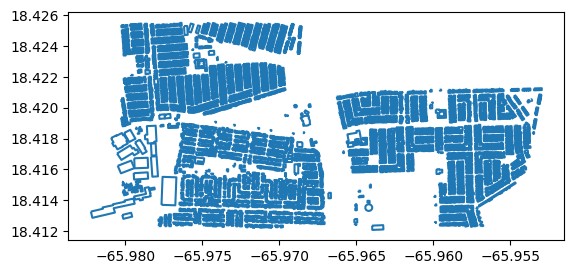

In [58]:
features.boundary.plot()

In [81]:
def average_centroid(gdf):
    # Ensure the GeoDataFrame is in a projected coordinate system for accurate distance calculations
    # Compute centroids of all geometries
    centroids = gdf.geometry.centroid

    # Calculate the mean of x and y coordinates
    avg_x = centroids.x.mean()
    avg_y = centroids.y.mean()

    # Return the average centroid as a Point geometry
    return gpd.GeoSeries([gpd.points_from_xy([avg_x], [avg_y])[0]], crs=gdf.crs)

avg_centroid = average_centroid(features)
print("Average Centroid:", avg_centroid)

Average Centroid: 0    POINT (-65.96822 18.41848)
dtype: geometry


In [89]:
for _, r in features.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r["geometry"])
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "blue"})
    folium.Popup().add_to(geo_j)
    geo_j.add_to(m)